In [133]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.preprocessing import StandardScaler

In [134]:
music_data=pd.read_csv('default_plus_chromatic_features_1059_tracks_new.csv',header=None)

print('music_data.shape - ',music_data.shape)

print('music_data.head - \n',music_data.head())

music_data.shape -  (1059, 117)
music_data.head - 
         0         1         2         3         4         5         6    \
0  7.161286  7.835325  2.911583  0.984049 -1.499546 -2.094097  0.576000   
1  0.225763 -0.094169 -0.603646  0.497745  0.874036  0.290280 -0.077659   
2 -0.692525 -0.517801 -0.788035  1.214351 -0.907214  0.880213  0.406899   
3 -0.735562 -0.684055  2.058215  0.716328 -0.011393  0.805396  1.497982   
4  0.570272  0.273157 -0.279214  0.083456  1.049331 -0.869295 -0.265858   

        7         8         9    ...       107       108       109       110  \
0 -1.205671  1.849122 -0.425598  ... -0.364194 -0.364194 -0.364194 -0.364194   
1 -0.887385  0.432062 -0.093963  ...  0.936616  0.936616  0.936616  0.936616   
2 -0.694895 -0.901869 -1.701574  ...  0.603755  0.603755  0.603755  0.603755   
3  0.114752  0.692847  0.052377  ...  0.187169  0.187169  0.187169  0.187169   
4 -0.401676 -0.872639  1.147483  ...  1.620715  1.620715  1.620715  1.620715   

        111     

In [135]:
X_input = music_data.iloc[:,:-1]

print('X_input.shape : ',X_input.shape)
print(X_input.head())

X_input.shape :  (1059, 116)
        0         1         2         3         4         5         6    \
0  7.161286  7.835325  2.911583  0.984049 -1.499546 -2.094097  0.576000   
1  0.225763 -0.094169 -0.603646  0.497745  0.874036  0.290280 -0.077659   
2 -0.692525 -0.517801 -0.788035  1.214351 -0.907214  0.880213  0.406899   
3 -0.735562 -0.684055  2.058215  0.716328 -0.011393  0.805396  1.497982   
4  0.570272  0.273157 -0.279214  0.083456  1.049331 -0.869295 -0.265858   

        7         8         9    ...       106       107       108       109  \
0 -1.205671  1.849122 -0.425598  ... -0.364194 -0.364194 -0.364194 -0.364194   
1 -0.887385  0.432062 -0.093963  ...  0.936616  0.936616  0.936616  0.936616   
2 -0.694895 -0.901869 -1.701574  ...  0.603755  0.603755  0.603755  0.603755   
3  0.114752  0.692847  0.052377  ...  0.187169  0.187169  0.187169  0.187169   
4 -0.401676 -0.872639  1.147483  ...  1.620715  1.620715  1.620715  1.620715   

        110       111       112       1

In [136]:
# Taking different number of cluster mostly to the power of 2
K=[2,4,8,16,24,32,40,64] 
# factorize - obtaining a numeric representation of an array when all that matters is identifying distinct values

#classes=pd.factorize(music_data[116])
#print('classes 1-', classes)

label_classes=pd.factorize(music_data[116])[0] #selecting only column 1 i.e numerical value
print('classes 2-', label_classes.shape)

print("labels of the music file : ",label_classes)
randIndex = np.zeros([len(K)])
print('randIndex : ',randIndex)

SSE = np.zeros([len(K)])
print('sum of square error : ',randIndex)

for k,j in zip(K,range(len(K))):
    k_means=KMeans(n_clusters=k,init='random',max_iter=200).fit(X_input)
    labels=k_means.labels_
    randIndex[j]=adjusted_rand_score(label_classes,labels)
    SSE[j]=k_means.inertia_ 
    #print(k_means,'\n',labels,'\n',randIndex[j],'\n',SSE[j])

print('\n \n')
print("Rand index and SSE for different K")
metric_data = pd.DataFrame(list(zip(K,randIndex,SSE)))
metric_data.columns = ['K','Rand Index','SSE']
print(metric_data.to_string(index=False))

classes 2- (1059,)
labels of the music file :  [ 0  1  2 ... 32 11 11]
randIndex :  [0. 0. 0. 0. 0. 0. 0. 0.]
sum of square error :  [0. 0. 0. 0. 0. 0. 0. 0.]

 

Rand index and SSE for different K
  K  Rand Index           SSE
  2    0.001783  93160.323623
  4    0.015163  77927.352178
  8    0.033889  67304.889160
 16    0.051614  57777.304564
 24    0.055914  52917.726813
 32    0.068100  49724.098814
 40    0.073387  46769.553462
 64    0.072062  42882.076887


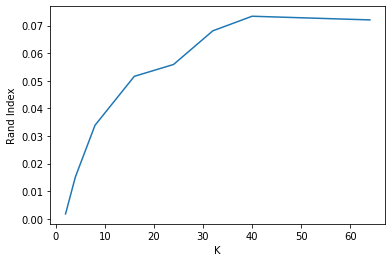

In [137]:
plt.xlabel('K')
plt.ylabel('Rand Index')
plt.plot(K,randIndex)
#plt.show()
plt.savefig('KvsRandindex.png')

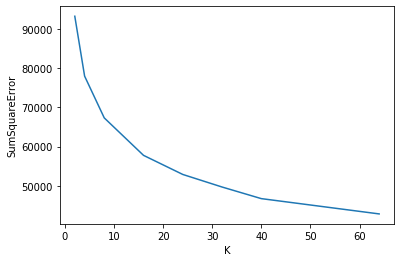

In [138]:
plt.xlabel('K')
plt.ylabel('SumSquareError')
plt.plot(K,SSE)
plt.savefig('KvsSumSquareError.png')
#plt.show()

As Sum squared error(SSE) is decreasing at lower rate from K=20 and aslo rand index for 20 clusters is more than 0.05 i am
considering *K=20* is good value

*TASK2*

In [139]:
# Part A
kmean_2C = KMeans(n_clusters=2, init="random", max_iter=200)
pca_2C = PCA(n_components=2)
print('pca_two:\n',pca_2C)

pca_labels = pca_2C.fit_transform(X_input)
print('pca_labels:\n',pca_labels.shape)

pca_res_std = StandardScaler().fit_transform(pca_labels)
print('pca_res_std \n',pca_res_std.shape)

y_pred_pca_2C = kmean_2C.fit_predict(pca_res_std)
y_pred_pca_2C

pca_two:
 PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
pca_labels:
 (1059, 2)
pca_res_std 
 (1059, 2)


array([0, 1, 0, ..., 0, 0, 1], dtype=int32)

plotting two clusters with two principle components

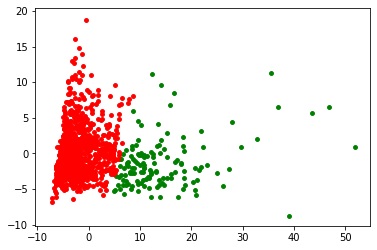

In [140]:
colours=['green','red']
m,n = music_data.shape[0],music_data.shape[1]
for k in range(2):
    grp = (y_pred_pca_two==k).reshape(m,1)
    plt.scatter(pca_labels[grp[:,0],0],pca_labels[grp[:,0],1],c=colours[k],s=15)
#plt.show()
plt.savefig('twoClusterScatterplot.png')

In [141]:
# Part B
N = [2,4,8,16,32]
k_mean = KMeans(n_clusters=20, init="random", max_iter=200)
randIndex_K = np.zeros([len(N)])
for i,l in zip(N,range(len(N))):
    pca = PCA(n_components=i)
    pca_final = pca.fit_transform(X_input)
    pca_final = StandardScaler().fit_transform(pca_final)
    y_pred_pca = k_mean.fit_predict(pca_final)
    randIndex_K[l] = adjusted_rand_score(classes,y_pred_pca)
    
print("Rand index for different no. of principal components for K=20")
df_rand=pd.DataFrame(list(zip(N,randIndex_K)))
df_rand.columns=['N','Rand Index']
print(df_rand.to_string(index=False))

Rand index for different no. of principal components for K=20
  N  Rand Index
  2    0.027821
  4    0.039101
  8    0.065434
 16    0.070218
 32    0.071892
